In [25]:
import pandas as pd 
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.impute import SimpleImputer
 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from imblearn.over_sampling import RandomOverSampler

from catboost import CatBoostClassifier

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint


In [2]:
df1 = pd.read_csv('aug_train.csv')
df1.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

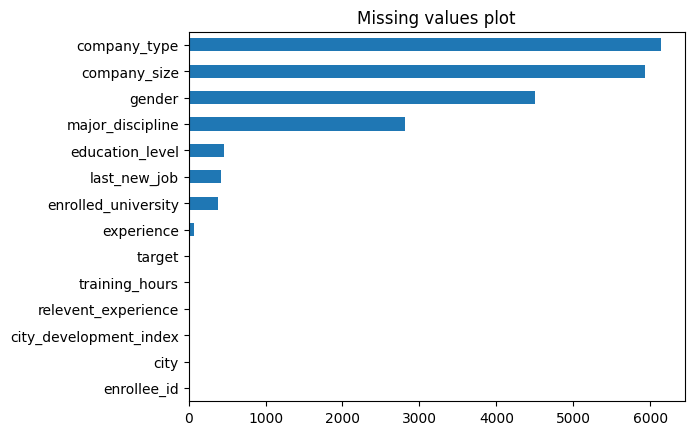

In [4]:
df1.isna().sum().sort_values().plot(kind='barh')
plt.title("Missing values plot")
plt.show()

In [5]:
categoricals = df1.select_dtypes("object")
categoricals.head()


,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
0,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1
1,city_40,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4
2,city_21,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never
3,city_115,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never
4,city_162,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4


In [6]:
for item in categoricals.columns:
    value_counts = categoricals[item].value_counts()
    print(f"The number of value counts in {item} is:\n {value_counts}")

The number of value counts in city is:
 city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_129       3
city_111       3
city_121       3
city_140       1
city_171       1
Name: city, Length: 123, dtype: int64
The number of value counts in gender is:
 Male      13221
Female     1238
Other       191
Name: gender, dtype: int64
The number of value counts in relevent_experience is:
 Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64
The number of value counts in enrolled_university is:
 no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64
The number of value counts in education_level is:
 Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64
The number of value counts in major_discipline is:
 STEM               14492


In [7]:
df1.duplicated().sum()

0

In [8]:
numericals = df1.select_dtypes("number")
numericals.head()

,enrollee_id,city_development_index,training_hours,target
0,8949,0.920,36,1
1,29725,0.776,47,0
2,11561,0.624,83,0
3,33241,0.789,52,1
4,666,0.767,8,0


### <ins> UNIVARIATE ANALYSIS </ins>

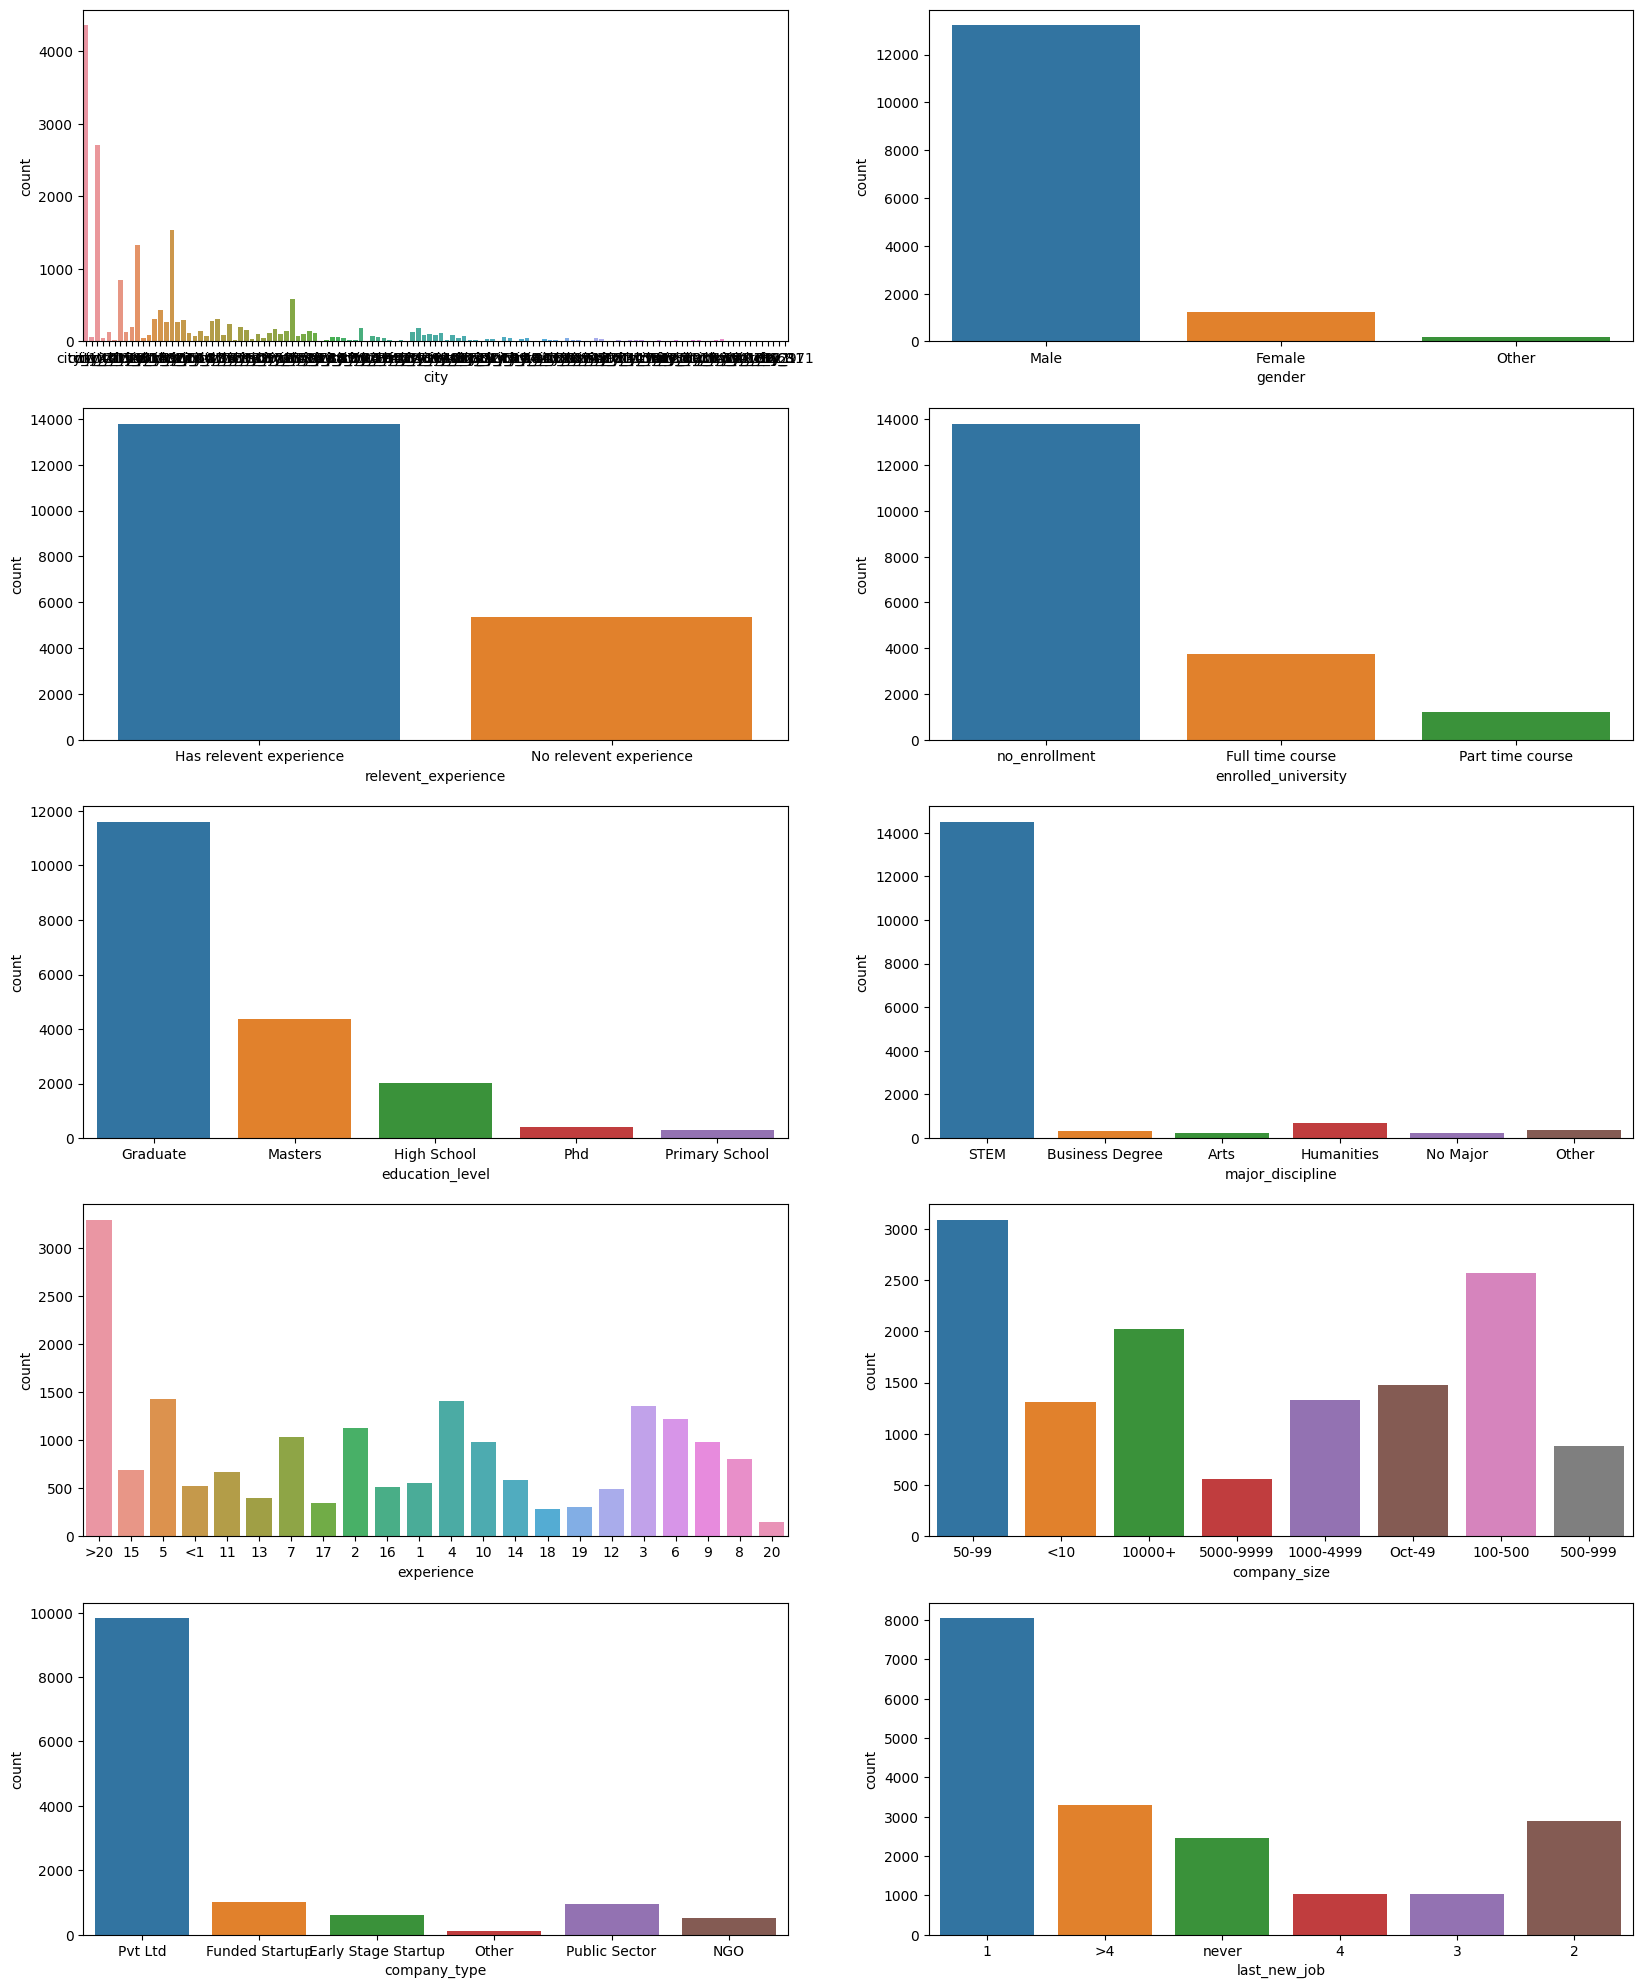

In [9]:
plt.figure(figsize=(20,25))
for i, cols in enumerate(categoricals.columns):
    plt.subplot(5,2,i+1)
    sns.countplot(data=categoricals, x=cols)

In [10]:
# Filling missing categorical varibles with the mode.
imp=SimpleImputer(strategy='most_frequent')

for column in categoricals.columns:
    categoricals[column] = imp.fit_transform(categoricals[[column]])

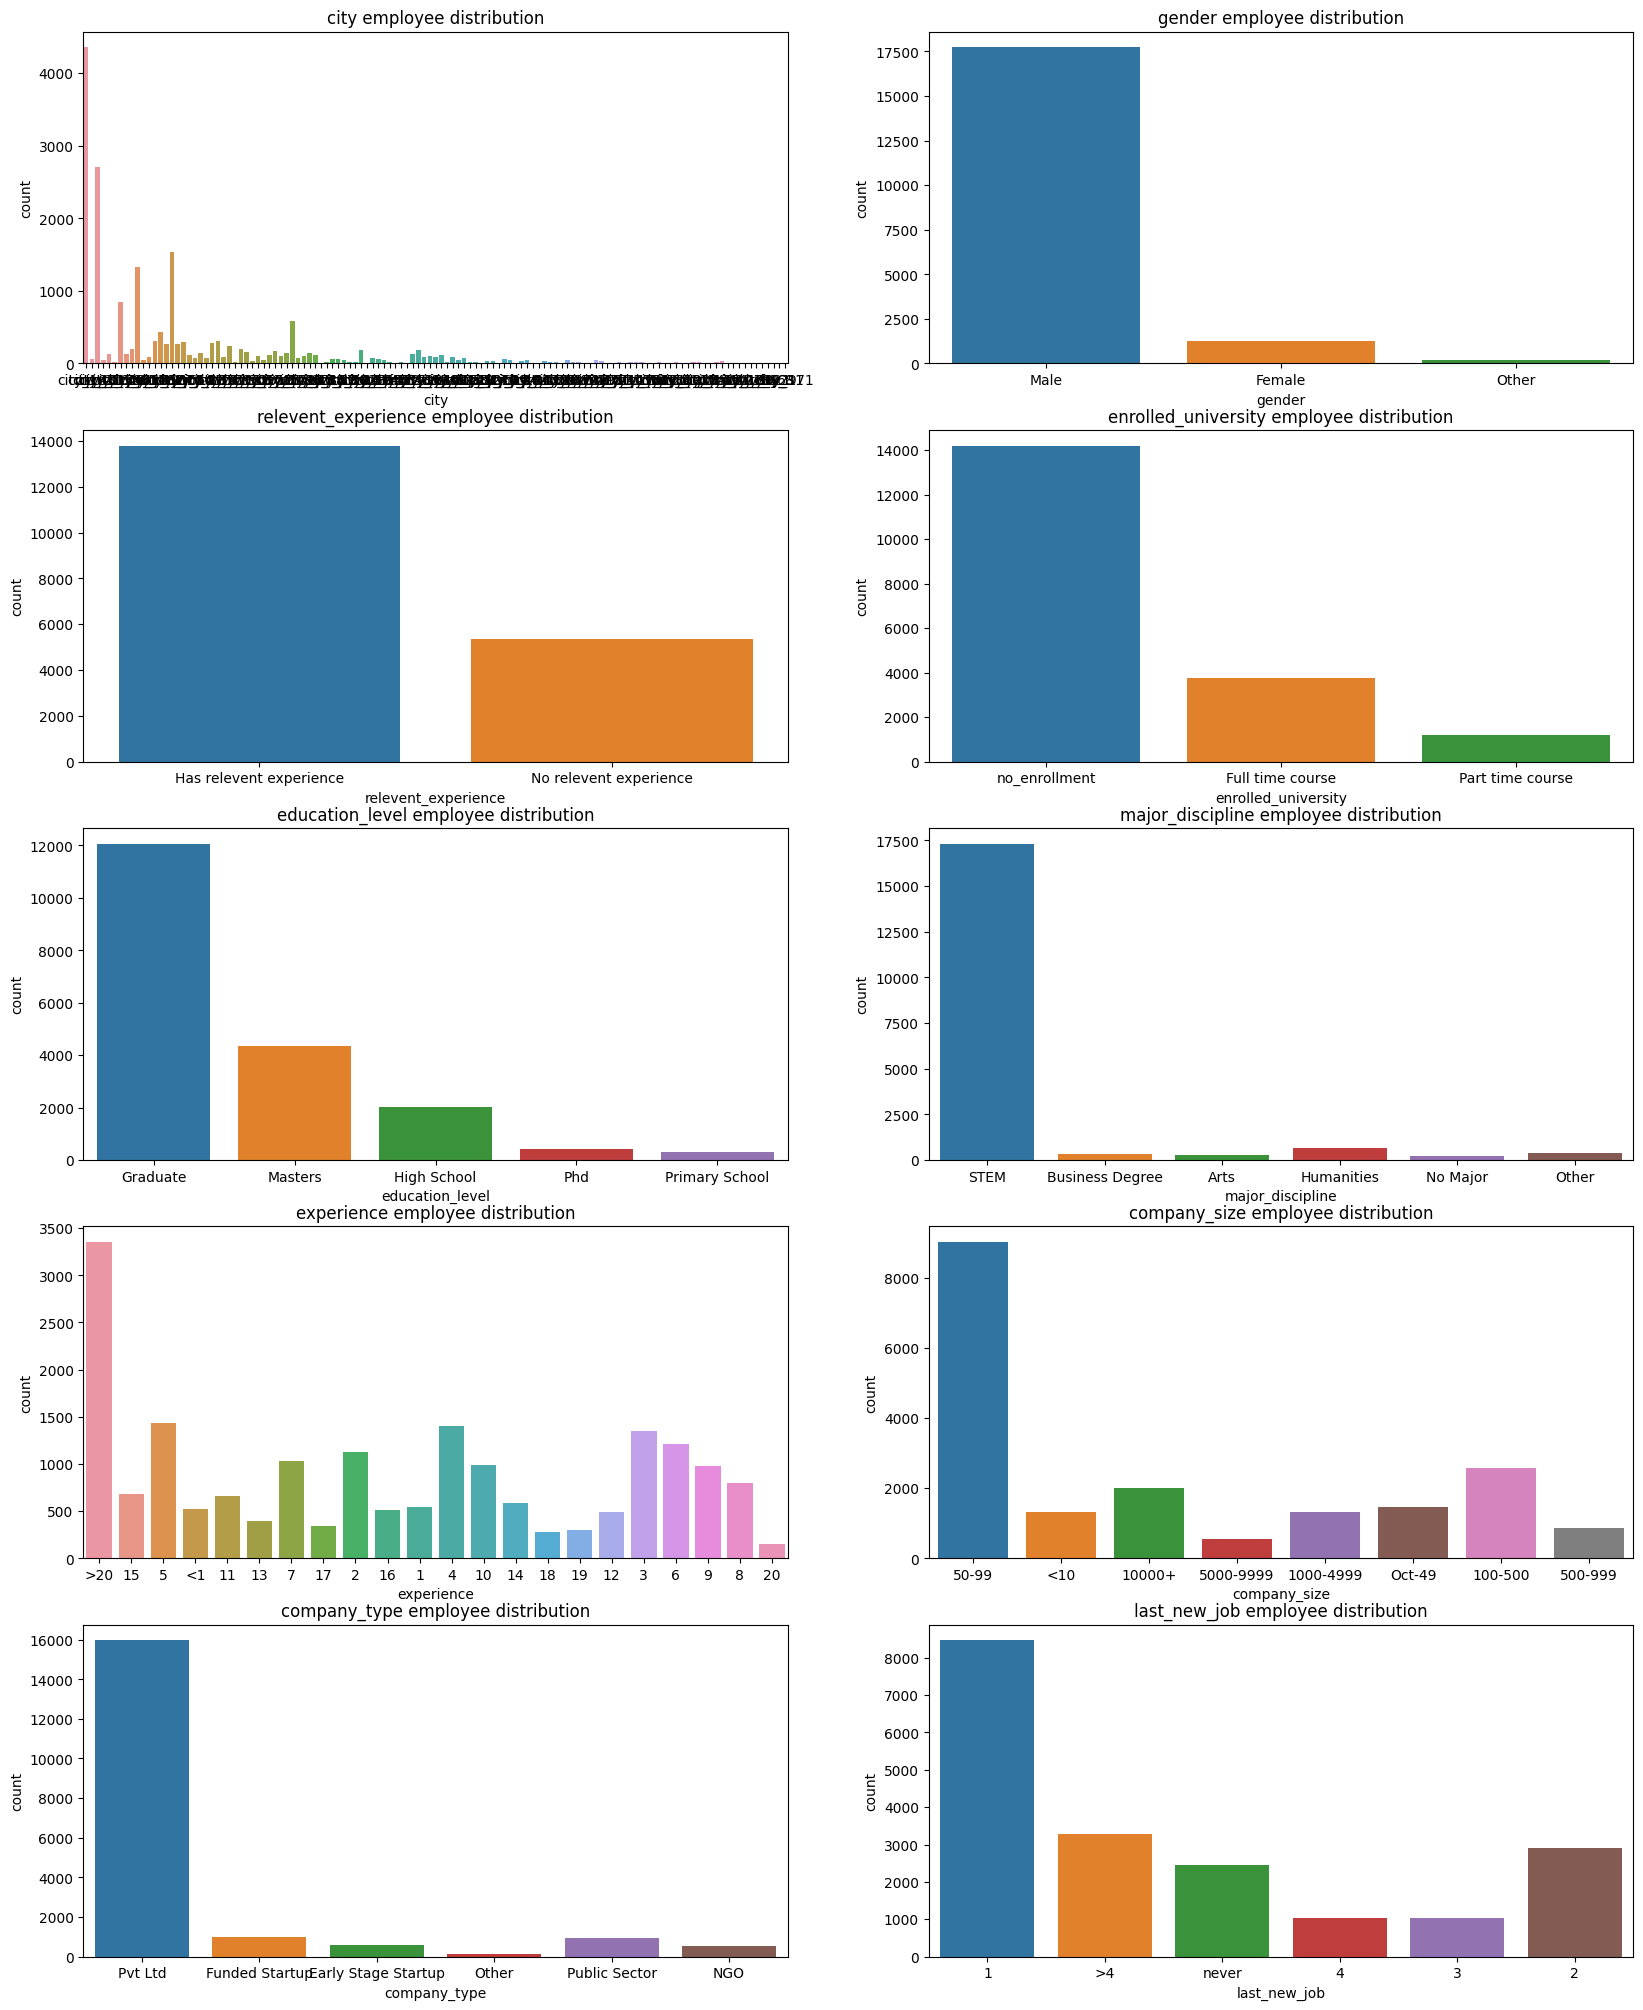

In [11]:

plt.figure(figsize=(20,25))
for i, cols in enumerate(categoricals.columns):
    plt.subplot(5,2,i+1)
    sns.countplot(data=categoricals, x=cols)
    plt.title(f"{cols} employee distribution")

In [12]:
categoricals.columns

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job'],
      dtype='object')

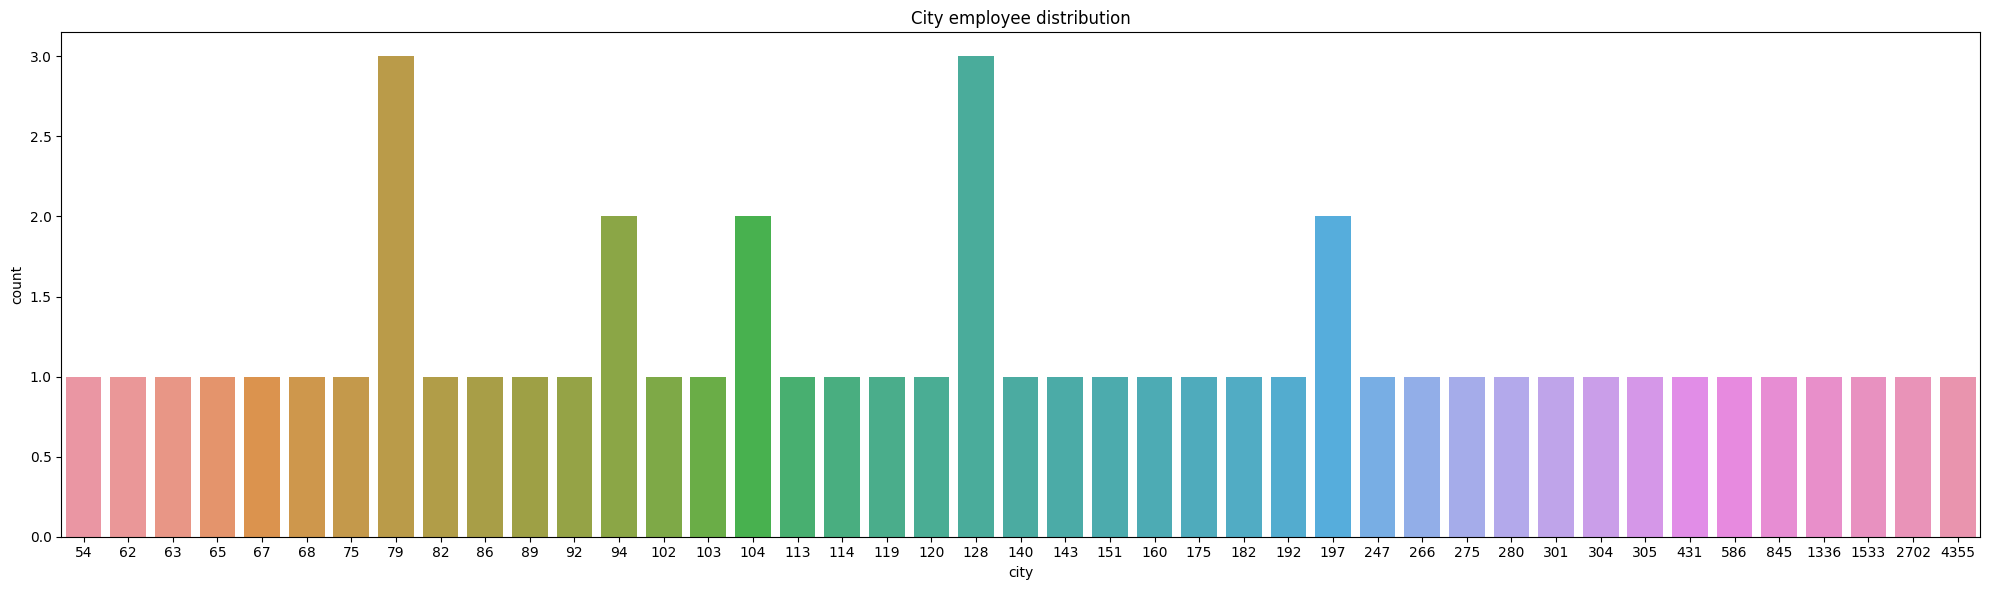

In [13]:
plt.figure(figsize=(20,6))
top_50 = categoricals['city'].value_counts().sort_values(ascending=False).head(50)
sns.countplot(data=categoricals, x=top_50)
plt.title("City employee distribution")
plt.tight_layout()
plt.show()

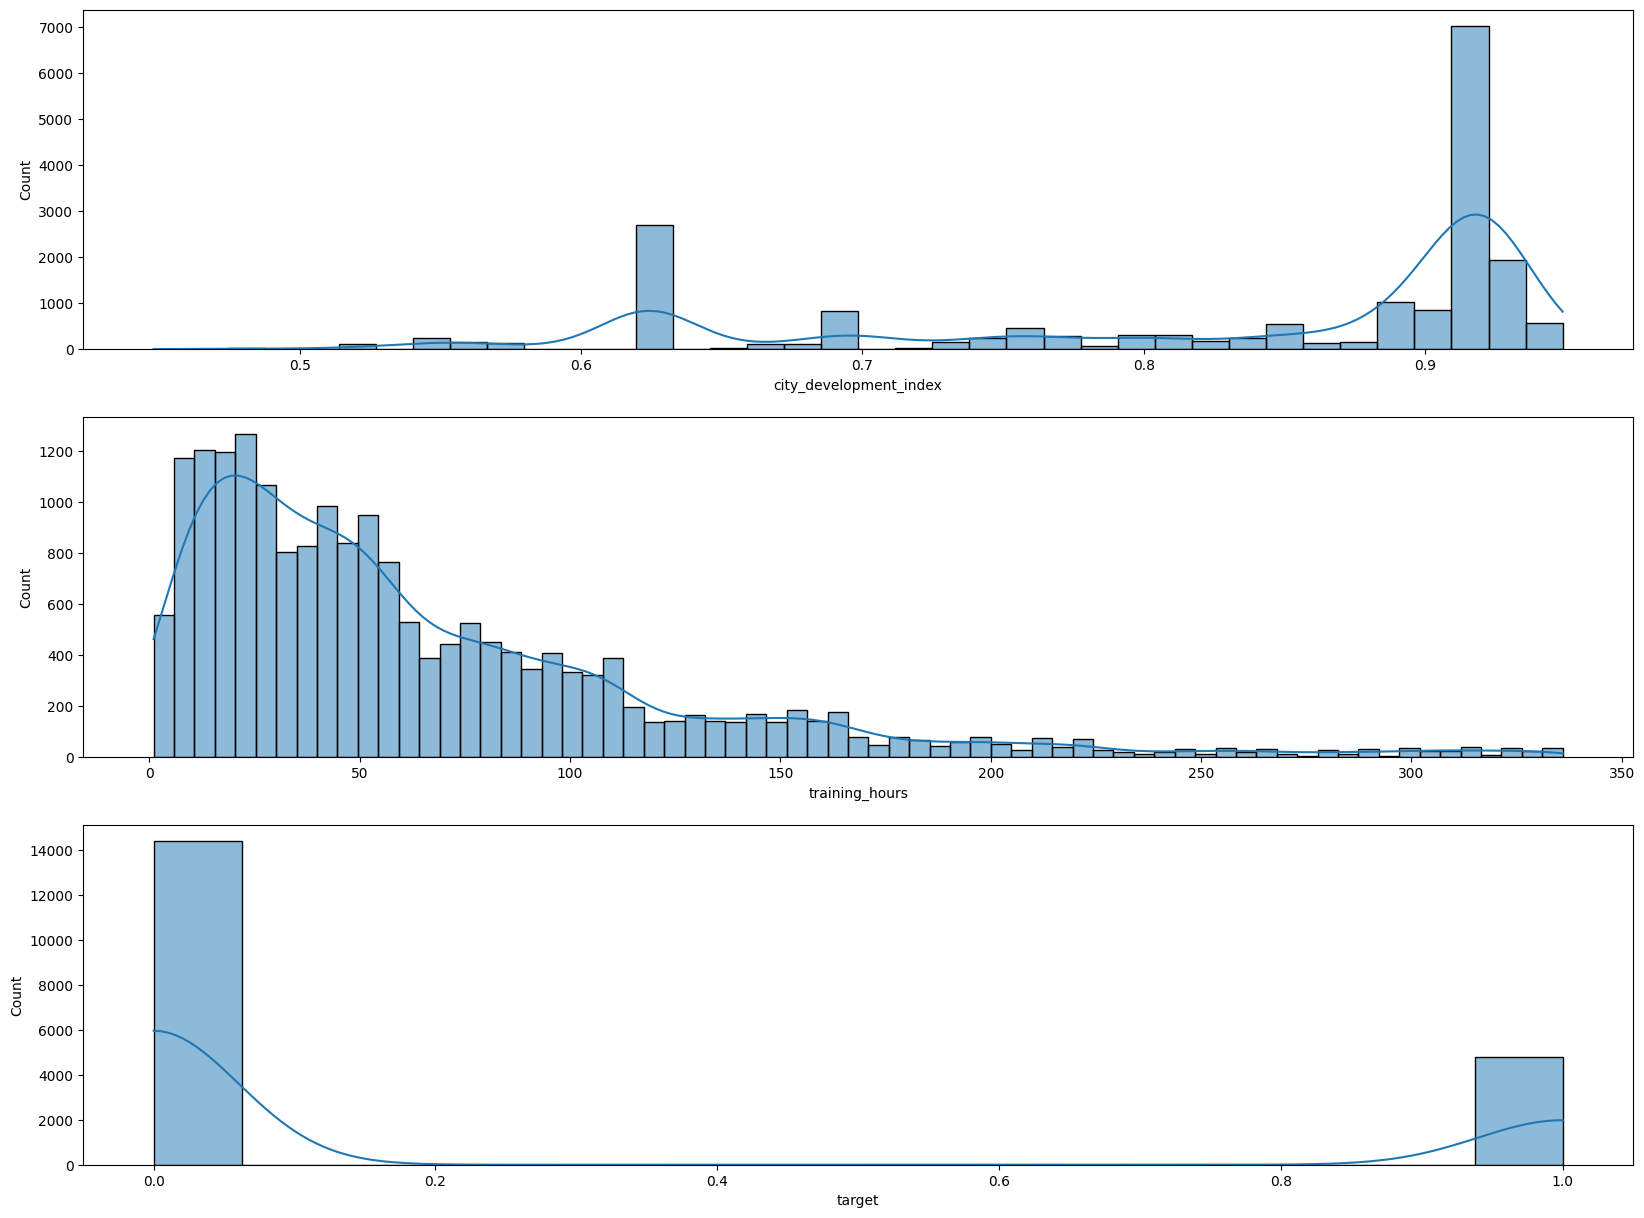

In [14]:
# Visualize distribution of numerical features.
g = numericals.drop(columns=['enrollee_id'], axis=1)

plt.figure(figsize=(20, 15))

for i, cols in enumerate(g.columns):
    plt.subplot( len(g.columns),1,i+1)
    sns.histplot(data=g, x=cols, kde=True)


<AxesSubplot: xlabel='target', ylabel='count'>

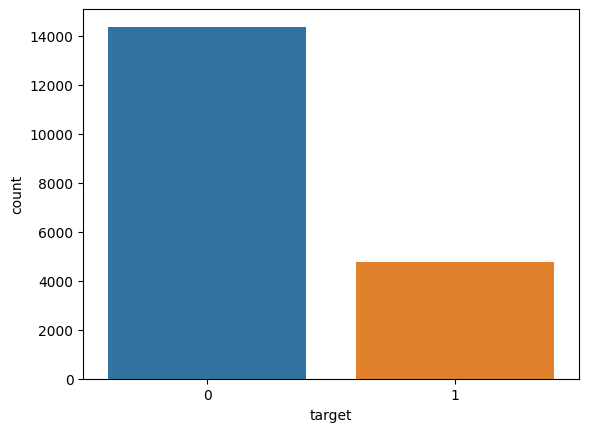

In [15]:
sns.countplot(data=numericals, x='target')

### <ins> Bivariate Analysis </ins>

In [16]:
categoricals_hrs = categoricals.drop(columns=['city'], axis=1)
categoricals_hrs['training_hours'] = df1['training_hours']
categoricals_hrs.columns

Index(['gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job', 'training_hours'],
      dtype='object')

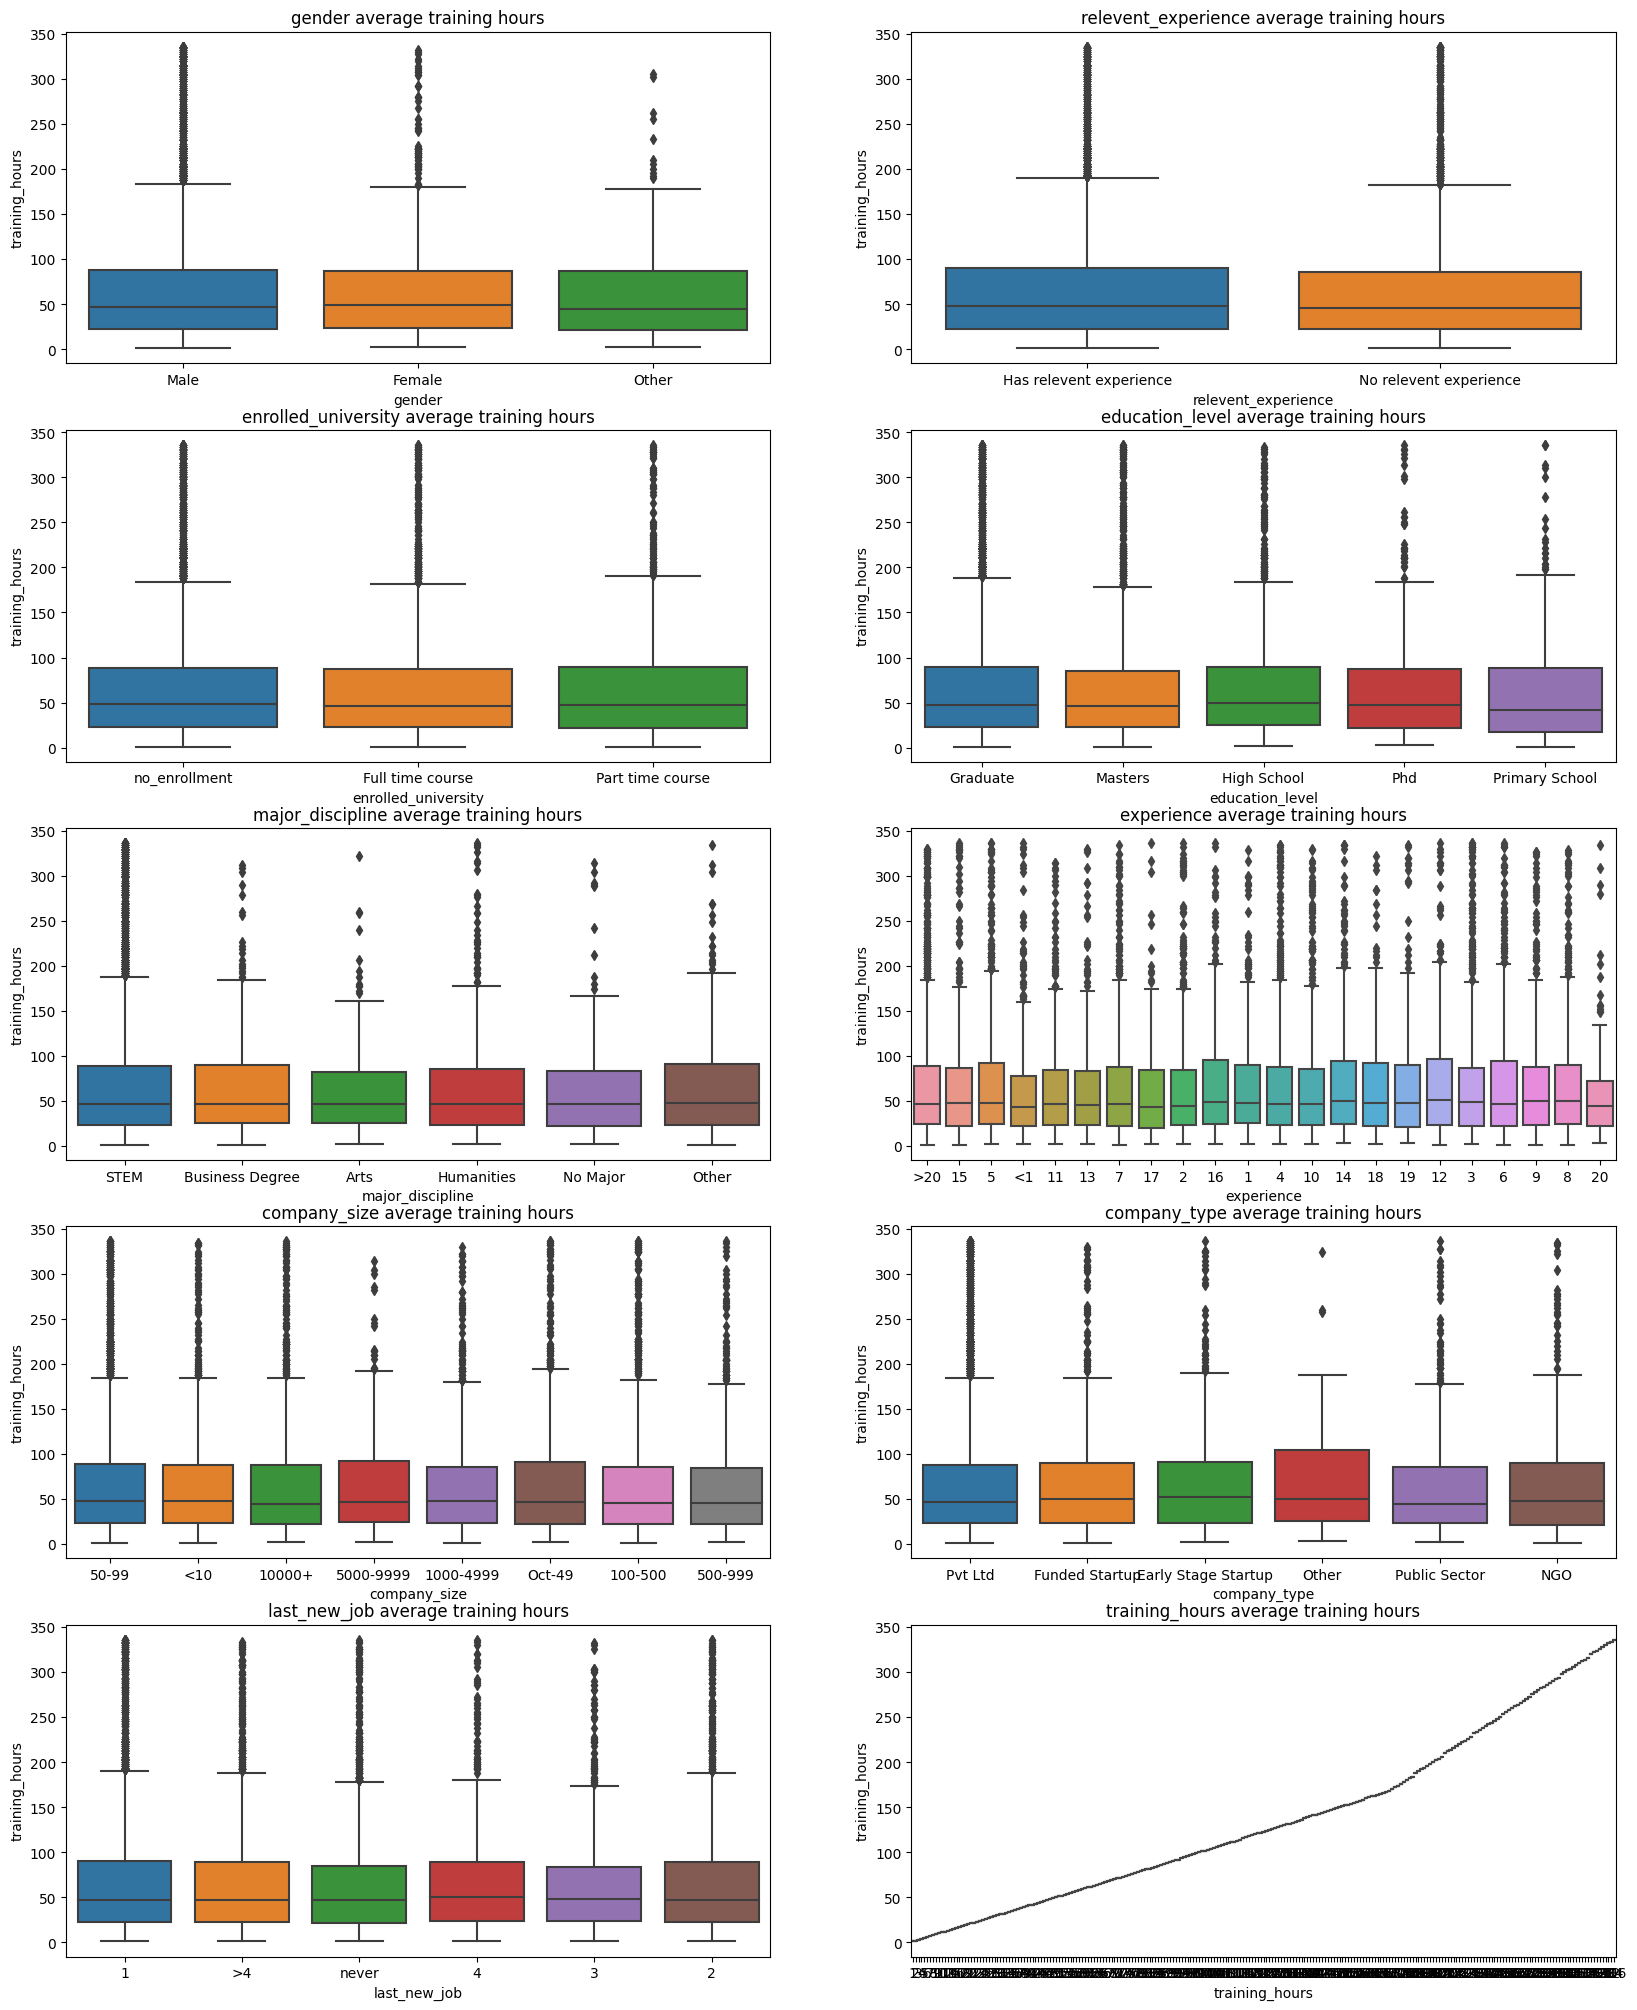

In [17]:
# Average training hours for every categorical column. They almost look the same and there is heavy presence of outliers.
plt.figure(figsize=(20,25))
for i, cols in enumerate(categoricals_hrs.columns):
    plt.subplot(5,2,i+1)
    sns.boxplot(data=categoricals_hrs, x=cols, y='training_hours')
    plt.title(f"{cols} average training hours")

##### There is heavy presence of outliers in the training hours. As such it is necessary to deal with them as they may affect the models' performance. The Robust Scaler handles outliers better in a statistical formart. Outliers are a problem for many statistical analyzes and machine learning models because they can cause tests to miss important results or distort actual results and machine learning models fail to generalize.

### <ins> Encoding and OverSampling </ins>

In [18]:
from sklearn.preprocessing import LabelEncoder
# Function for encoding categorical columns.
def transform(new_data):
    le = LabelEncoder()
    for item in new_data.columns:
        new_data[item] = le.fit_transform(new_data[item])

    return new_data

In [19]:
new = df1.drop(columns=['target'])
new_cats = transform(new)
new_cats.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,5018,5,85,1,0,2,0,5,21,8,6,0,35
1,16986,77,48,1,1,2,0,5,6,3,5,4,46
2,6499,64,14,3,1,0,0,5,15,8,6,5,82
3,19067,14,52,3,1,3,0,1,20,8,5,5,51
4,358,50,45,1,0,2,2,5,21,3,1,3,7


In [20]:
# X = new_cats + df1[['city_development_index','training_hours']]

X = new_cats
y = df1['target']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size=0.2)

In [22]:
rom = RandomOverSampler(sampling_strategy="not majority", random_state=20)

X_train_resampled, y_train_resampled = rom.fit_resample(X_train, y_train)

# y = pd.Series(y_resampled, name=target_column)

In [24]:
y_train_resampled.value_counts()

1    11484
0    11484
Name: target, dtype: int64

#### <ins> Logistic Regression </ins>

In [23]:
mnb=MultinomialNB()
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier(criterion='gini')
dtcr=DecisionTreeClassifier(criterion='entropy')
catclf = CatBoostClassifier()

model=[mnb,knn,dtc,dtcr]

for i in model:
    i.fit(X_train_resampled,y_train_resampled)
    print("Score: ",i,i.score(X_train_resampled,y_train_resampled))
    mpred=i.predict(X_test)
    print('Accuracy_score: ',accuracy_score(y_test, mpred))
    print("Confusion_matrix: ",confusion_matrix(y_test, mpred))
    
    print('Classification Report: \n',classification_report(y_test, mpred))
    print('\n')

Score:  MultinomialNB() 0.6127655869035179
Accuracy_score:  0.6062108559498957
Confusion_matrix:  [[1730 1167]
 [ 342  593]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.60      0.70      2897
           1       0.34      0.63      0.44       935

    accuracy                           0.61      3832
   macro avg       0.59      0.62      0.57      3832
weighted avg       0.71      0.61      0.63      3832



Score:  KNeighborsClassifier() 0.8212295367467781
Accuracy_score:  0.6002087682672234
Confusion_matrix:  [[1774 1123]
 [ 409  526]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.61      0.70      2897
           1       0.32      0.56      0.41       935

    accuracy                           0.60      3832
   macro avg       0.57      0.59      0.55      3832
weighted avg       0.69      0.60      0.63      3832



Score:  DecisionTreeClassifier() 1.

In [26]:
pd.crosstab(y_test, mpred)

col_0,0,1
target,,
0,2354,543
1,496,439


##### Only 2354 out of 2897 of class 0 were correctly classified. 

##### Only 439 out of 935 of class 1 were correctly classified.

#### <ins> SMOTE for imbalanced data classes </ins>

Explore a different method(SMOTE) to handle the class imbalances to compaire the recall and precision scores for both classes.

In [28]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [32]:
mnb=MultinomialNB()
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier(criterion='gini')
dtcr=DecisionTreeClassifier(criterion='entropy')
catclf = CatBoostClassifier(learning_rate=0.001)

model=[mnb,knn,dtc,dtcr, catclf]

for i in model:
    i.fit(X_train_smote,y_train_smote)
    print("Score: ",i,i.score(X_train_smote,y_train_smote))
    mpred=i.predict(X_test)
    print('Accuracy_score: ',accuracy_score(y_test, mpred))
    print("Confusion_matrix: ",confusion_matrix(y_test, mpred))
    
    print('Classification Report: \n',classification_report(y_test, mpred))
    print('\n')

Score:  MultinomialNB() 0.6082810867293625
Accuracy_score:  0.5981210855949896
Confusion_matrix:  [[1711 1186]
 [ 354  581]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.59      0.69      2897
           1       0.33      0.62      0.43       935

    accuracy                           0.60      3832
   macro avg       0.58      0.61      0.56      3832
weighted avg       0.71      0.60      0.63      3832



Score:  KNeighborsClassifier() 0.8343782654127482
Accuracy_score:  0.6056889352818372
Confusion_matrix:  [[1803 1094]
 [ 417  518]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.62      0.70      2897
           1       0.32      0.55      0.41       935

    accuracy                           0.61      3832
   macro avg       0.57      0.59      0.56      3832
weighted avg       0.69      0.61      0.63      3832



Score:  DecisionTreeClassifier() 1.

##### Catboost classifier seems to be the best model in terms of precision scores and recall scores as compaired to all other models. It also offers better scores for class 1. This is the model to perform hyperparameter tuning on. 

In [33]:



param_dist = {
    'iterations': randint(50, 200),  
    'depth': randint(6,10),  
    'learning_rate': uniform(0.01,0.001),  
    'l2_leaf_reg': uniform(1, 10),  
    'border_count': randint(32, 255),  
}

random_search = RandomizedSearchCV(
    catclf, param_distributions=param_dist, n_iter=10, cv=5, scoring='f1', random_state=42, n_jobs=-1
)

random_search.fit(X_train_smote, y_train_smote)

best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

best_catclf = CatBoostClassifier(**best_params)
best_catclf.fit(X_train_smote, y_train_smote)

y_pred = best_catclf.predict(X_test)
print("Final Model Classification Report:")
print(classification_report(y_test, y_pred))


0:	learn: 0.6896376	total: 24.1ms	remaining: 3.4s
1:	learn: 0.6861370	total: 37.2ms	remaining: 2.6s
2:	learn: 0.6825824	total: 52.1ms	remaining: 2.41s
3:	learn: 0.6793947	total: 65.9ms	remaining: 2.27s
4:	learn: 0.6759580	total: 78.2ms	remaining: 2.14s
5:	learn: 0.6725184	total: 92ms	remaining: 2.08s
6:	learn: 0.6692474	total: 102ms	remaining: 1.97s
7:	learn: 0.6659968	total: 117ms	remaining: 1.96s
8:	learn: 0.6629804	total: 129ms	remaining: 1.9s
9:	learn: 0.6600739	total: 140ms	remaining: 1.84s
10:	learn: 0.6571958	total: 152ms	remaining: 1.81s
11:	learn: 0.6540778	total: 161ms	remaining: 1.74s
12:	learn: 0.6512578	total: 173ms	remaining: 1.72s
13:	learn: 0.6482854	total: 183ms	remaining: 1.67s
14:	learn: 0.6456144	total: 202ms	remaining: 1.71s
15:	learn: 0.6428244	total: 217ms	remaining: 1.71s
16:	learn: 0.6401140	total: 232ms	remaining: 1.7s
17:	learn: 0.6377316	total: 243ms	remaining: 1.68s
18:	learn: 0.6352205	total: 259ms	remaining: 1.68s
19:	learn: 0.6327374	total: 275ms	remaini

##### Hyperparameter tuning using a random search improves the score for both class 1 and 0. Random search is not computationally expensive as compaired to Grid Search CV. 

##### Interpretation:
* **The classifier performs well for Class 0 with high precision, recall, and F1-score.**
* **For Class 1, the performance is moderate, with lower precision, recall, and F1-score compared to Class 0.**
* **The weighted average F1-score accounts for the class imbalance, giving a balanced view of overall performance.**